Original columns:
Index(['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score'], dtype='object')

Numeric columns:
Index(['Age', 'Annual Income', 'Spending Score'], dtype='object')


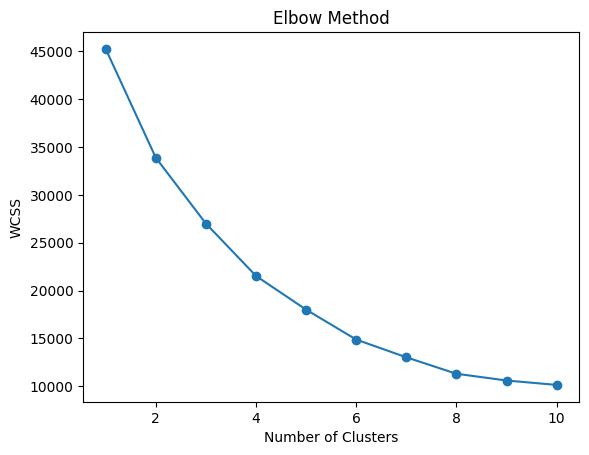

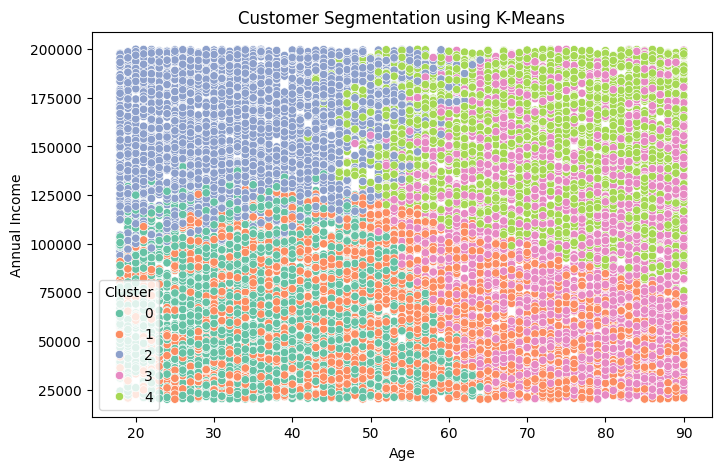


Cluster Analysis:
               Age  Annual Income  Spending Score
Cluster                                          
0        36.815013   66569.745691       28.275756
1        53.059369   63059.945269       78.077922
2        34.999085  159650.847561       49.609451
3        74.021040  104864.337562       24.062809
4        71.786921  152273.000735       72.023880

✅ Project completed successfully. segmented_customers.csv saved.


In [19]:
# =========================================
# CUSTOMER SEGMENTATION ANALYSIS
# Shopping Mall Dataset
# Oasis Infobyte - Level 1
# =========================================

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# -----------------------------------------
# 2. LOAD DATASET
# -----------------------------------------
df = pd.read_csv("/content/Shopping Mall Customer Segmentation Data .csv")

# -----------------------------------------
# 3. CLEAN COLUMN NAMES
# -----------------------------------------
df.columns = df.columns.str.strip()

print("Original columns:")
print(df.columns)

# -----------------------------------------
# 4. DATA CLEANING
# -----------------------------------------
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# -----------------------------------------
# 5. SELECT ONLY NUMERIC COLUMNS (IMPORTANT FIX)
# -----------------------------------------
# Print numeric columns
print("\nNumeric columns:")
print(df.select_dtypes(include=['int64', 'float64']).columns)

# Choose ONLY numeric features for clustering
X = df.select_dtypes(include=['int64', 'float64'])

# OPTIONAL: remove CustomerID if present
if 'CustomerID' in X.columns:
    X = X.drop(columns=['CustomerID'])

# -----------------------------------------
# 6. FEATURE SCALING (ERROR FIXED)
# -----------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------------------
# 7. ELBOW METHOD
# -----------------------------------------
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# -----------------------------------------
# 8. APPLY K-MEANS
# -----------------------------------------
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# -----------------------------------------
# 9. VISUALIZATION (USING MAIN FEATURES)
# -----------------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df[X.columns[0]],
    y=df[X.columns[1]],
    hue=df['Cluster'],
    palette='Set2'
)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("Customer Segmentation using K-Means")
plt.show()

# -----------------------------------------
# 10. CLUSTER ANALYSIS
# -----------------------------------------
print("\nCluster Analysis:")
print(df.groupby('Cluster')[X.columns].mean())

# -----------------------------------------
# 11. SAVE OUTPUT
# -----------------------------------------
df.to_csv("/content/segmented_customers.csv", index=False)

print("\n✅ Project completed successfully. segmented_customers.csv saved.")
